**Practical Lab 2 - Data Visualization and Publication**

**1.** *Matplotlib graphs*

***The simplest way of creating a Figure with an Axes is using .pyplot.subplots. We can then use .Axes.plot to draw some data on the Axes***

In [69]:
#importing necessary libraries

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


Text(0, 0.5, 'entry b')

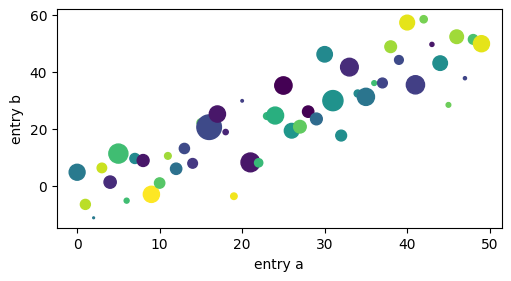

In [5]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

**Coding styles**

***There are two ways to use Matplotlib:*** *The __explicit__ and the __implicit__ interfaces*

- **Explicit**: *create Figures and Axes, and call methods on them (this is also called the "object-oriented (OO) style"). This is the approach we took above*.

- **Implicit**: *Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting*.


**Explicit**

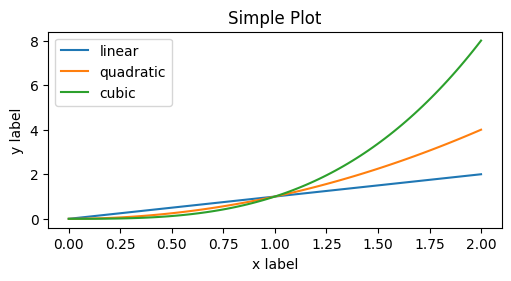

In [6]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

**Implicit**

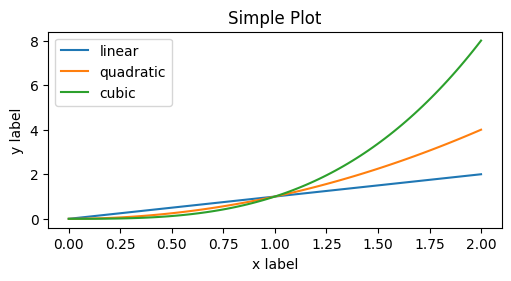

In [7]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

**Styling**

*Most plotting methods have styling options, accessible either when a plotting method is called, or from a "setter" on the Artist class. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by Axes.plot, and we set the linestyle of the second line after the fact with Line2D.set_linestyle..*

Text(0.5, 1.0, 'Sin(x) and Cos(x) Plot')

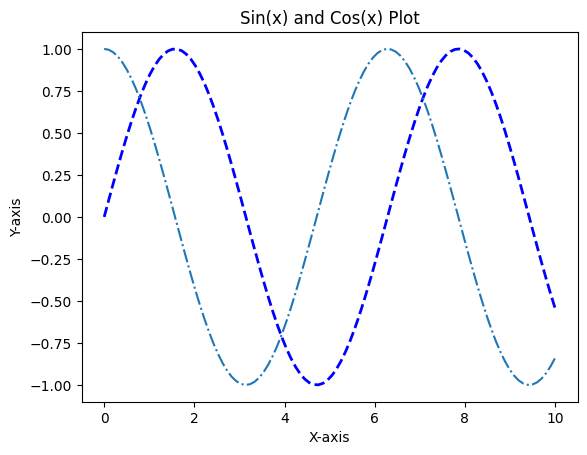

In [41]:
# Generate some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first line with specific styling
line1, = ax.plot(x, y1, color='blue', linewidth=2, linestyle='--', label='Sin(x)')

# Plot the second line without styling
line2, = ax.plot(x, y2, label='Cos(x)')

# Customize the second line's linestyle after the fact using Line2D.set_linestyle
line2.set_linestyle('-.')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Sin(x) and Cos(x) Plot')



**Colors**

*Matplotlib has a very flexible array of colors that are accepted for most Artists. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior*

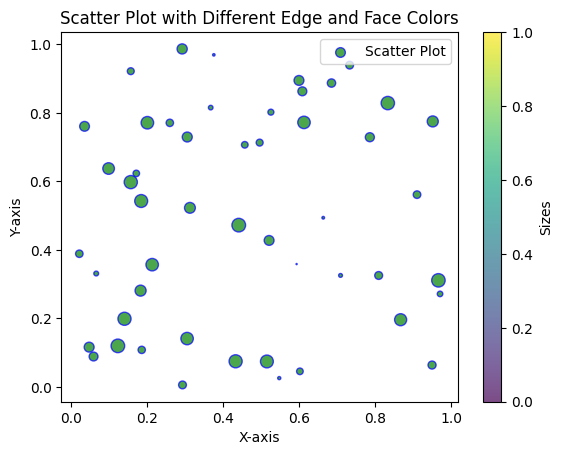

In [43]:
# Generate some sample data
np.random.seed(42)
x = np.random.rand(50)
y = np.random.rand(50)
sizes = np.random.rand(50) * 100  # Random sizes for markers

# Create a figure and axis
fig, ax = plt.subplots()

# Scatter plot with different edge and face colors
scatter = ax.scatter(x, y, s=sizes, c='green', edgecolors='blue', alpha=0.7, label='Scatter Plot')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Scatter Plot with Different Edge and Face Colors')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Sizes')

# Add legend
ax.legend()

# Show the plot
plt.show()


**Linewidths, linestyles, and markersizes**

*Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle.*

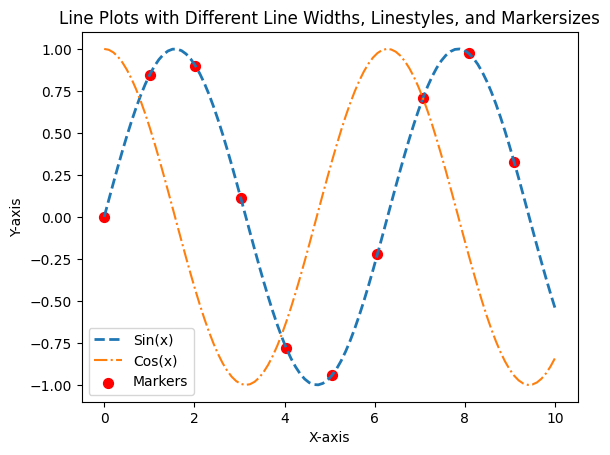

In [19]:
# Generate some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first line with custom linewidth and linestyle
line1, = ax.plot(x, y1, linewidth=2, linestyle='--', label='Sin(x)')

# Plot the second line with different linewidth and linestyle
line2, = ax.plot(x, y2, linewidth=1.5, linestyle='-.', label='Cos(x)')

# Scatter plot with custom markersize
ax.scatter(x[::10], y1[::10], marker='o', s=50, color='red', label='Markers')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Line Plots with Different Line Widths, Linestyles, and Markersizes')

# Add legend
ax.legend()

# Show the plot
plt.show()


**Labelling plots**

***Axes labels and text***
*Axes.set_xlabel, Axes.set_ylabel, and Axes.set_title are used to add text in the indicated locations. Text can also be directly added to plots using ~.Axes.text*

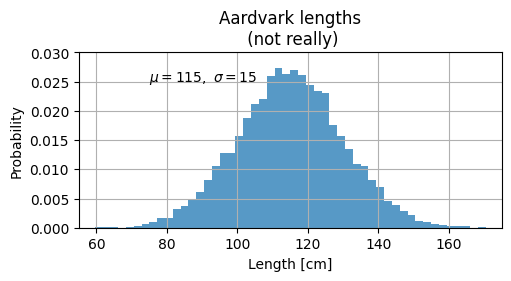

In [25]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

***Using mathematical expressions in text***

*Matplotlib accepts TeX equation expressions in any text expression. For example to write the expression in the title, you can write a TeX expression surrounded by dollar signs*

**ax.set_title(r'$\sigma_i=15$')**

*where the r preceding the title string signifies that the string is a ***raw*** string and not to treat backslashes as python escapes. Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts*

**Annotations**

*We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext*

(-2.0, 2.0)

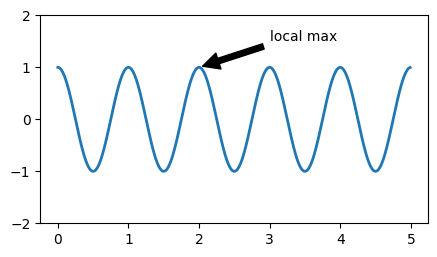

In [26]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

**Legends**

*Often we want to identify lines or markers with a .Axes.legend*


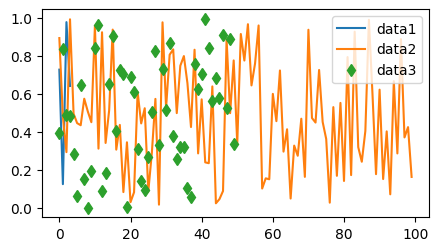

In [28]:
# make 4 random data sets
(data1)=np.random.rand(4)
(data2)=np.random.rand(100)
(data3)=np.random.rand(50)
(data4)=np.random.rand(30)
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

**Axis scales and ticks**

Each Axes has two (or three) Axis objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

**Scales**

*In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like Axes.loglog, Axes.semilogx, and Axes.semilogy.*

Here we set the scale manually

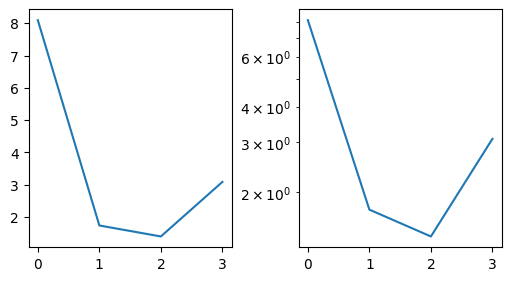

In [44]:
# make 4 random data sets
(data1)=np.random.rand(4)
(data2)=np.random.rand(100)
(data3)=np.random.rand(50)
(data4)=np.random.rand(30)

fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

**Tick locators and formatters**

*Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this is ~.Axes.set_xticks*

Text(0.5, 1.0, 'Manual ticks')

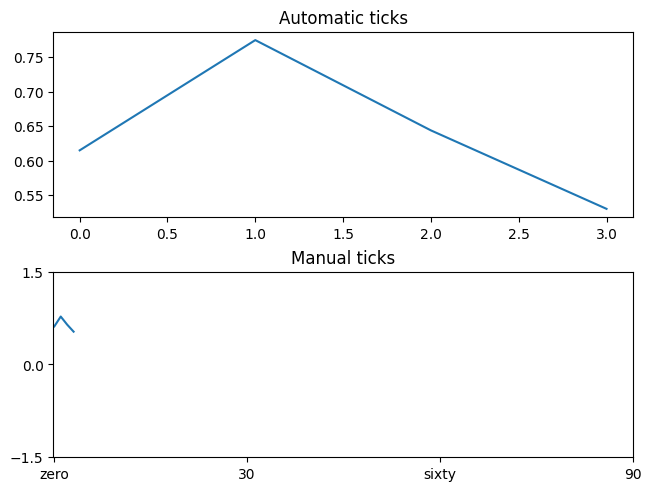

In [56]:

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

**Plotting dates and strings**

*Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates*

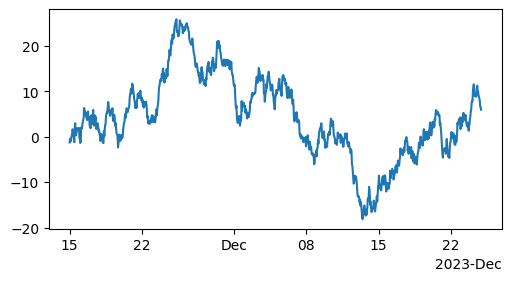

In [58]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2023-11-15'), np.datetime64('2023-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

*For strings*

<BarContainer object of 4 artists>

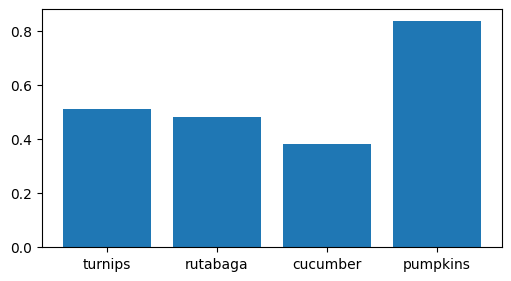

In [59]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

**Working with multiple Figures and Axes**

You can open multiple Figures with multiple calls to **fig = plt.figure()** or **fig2, ax = plt.subplots()**. By keeping the object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is plt.subplots() as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using **pyplot.subplot_mosaic**.

The easiest way to create a new Figure is with pyplot:

fig = plt.figure()  # an empty figure with no Axes
   fig, ax = plt.subplots()  # a figure with a single Axes
   fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
   # a figure with one axes on the left, and two on the right:
   fig, axs = plt.subplot_mosaic([['left', 'right-top'], ['left', 'right_bottom]])

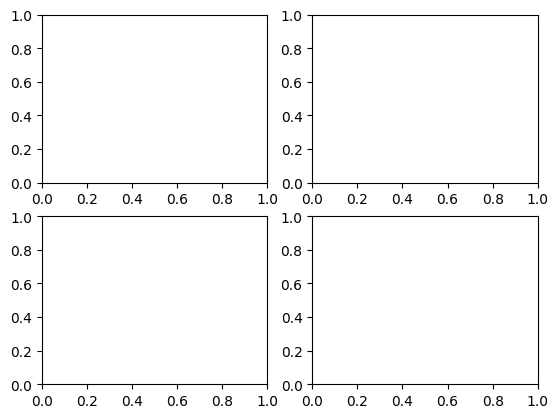

In [60]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

Text(0.5, 1.0, 'right')

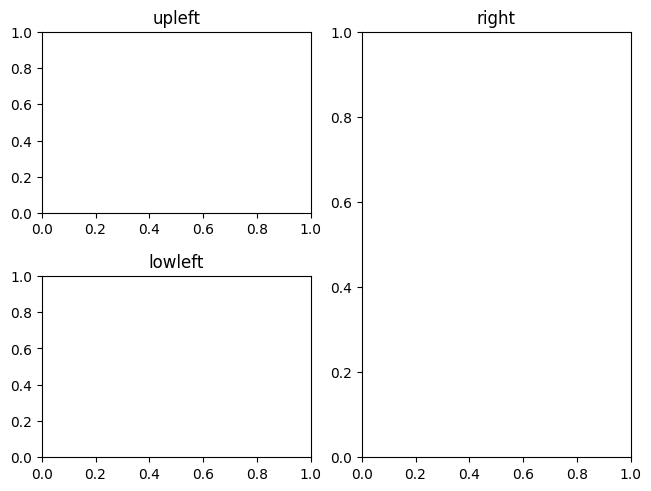

In [61]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

**2.** ***Seaborn***

*Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.*

<Axes: xlabel='timepoint', ylabel='signal'>

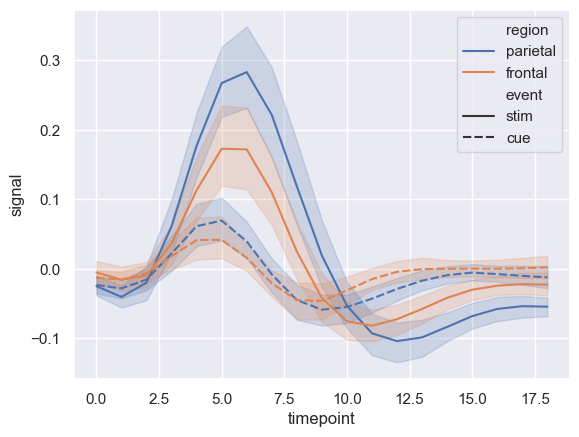

In [2]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

*Here's a another simple Seaborn code that creates a scatter plot with a linear regression line*

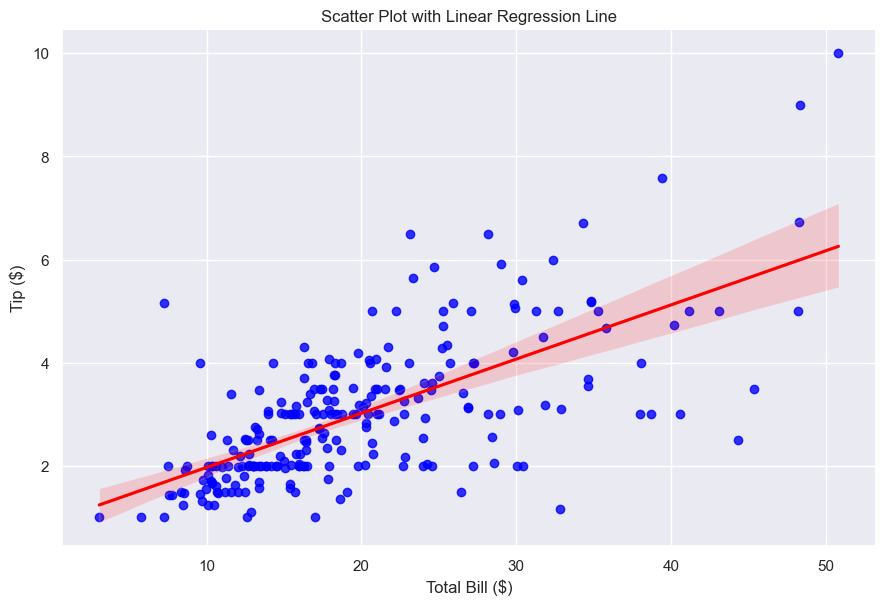

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset from Seaborn
tips = sns.load_dataset('tips')

# Create a scatter plot with a linear regression line using Seaborn
sns.lmplot(x='total_bill', y='tip', data=tips, height=6, aspect=1.5, markers='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Set labels and title
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Scatter Plot with Linear Regression Line')

# Show the plot
plt.show()


**3.** ***Plotly***

***Plotly Express in Python***

*The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures. Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance*

**source:** [Plotly Docs](https://plotly.com/python/plotly-express/)

In [1]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

 *Here's a another simple example of a line chart using Plotly* 

In [3]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()